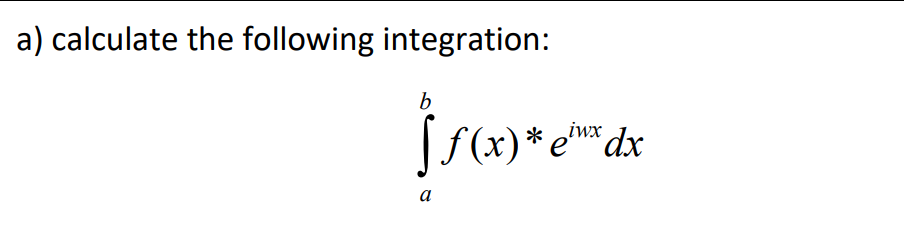

In [14]:
import numpy as np

#define the function f(x) which takes a single argument x 
#and returns the value of a complex function np.cos(x) + 6j * np.sin(2*x)
def f(x):
    return np.cos(x) + 6j * np.sin(2*x)

#integration without built in function 
def integrate_without_builtin(a, b, w, num_steps=100000):
    delta_x = (b - a) / num_steps
    #Area under the curve
    integral = 0 
    #using Riemann sum. It divides the interval [a, b] into num_steps (subintervals)
    for i in range(num_steps):
        x = a + i * delta_x
        #calculates the value of the function f(x) at each subinterval
        integral += f(x) * np.exp(1j * w * x) * delta_x
    return integral

#integration with built in function 
def integrate_using_builtin(a, b, w):
    #quad computes a definite integral using quadrature methods.
    from scipy.integrate import quad
    #a lambda function representing the real and imaginary parts
    real_integral, imag_integral = quad(lambda x: np.real(f(x)) * np.cos(w * x) - np.imag(f(x)) * np.sin(w * x), a, b)
    return real_integral + 1j * imag_integral

# c) Compare you results with respect to the analytical form 
def compare_with_analytical(a, b, w):
    #to handle the integration of the complex exponential term.
    #By subtracting we obtain the analytical value of the integral.
    analytical_integral = (1j / w) * (f(b) * np.exp(1j * w * b) - f(a) * np.exp(1j * w * a))
    return analytical_integral

#The user should enter a, b and W
def main():
    a = float(input("Enter the lower limit of integration (a): "))
    b = float(input("Enter the upper limit of integration (b): "))
    w = float(input("Enter the frequency (w): "))
    
    #Then it calls the three integration methods
    integral_without_builtin = integrate_without_builtin(a, b, w)
    integral_using_builtin = integrate_using_builtin(a, b, w)
    analytical_integral = compare_with_analytical(a, b, w)
    
#b) show the results in Cartesian form ( z = x + yi)
    print("\nIntegral without using built-in functions (Cartesian form):", integral_without_builtin)
    print("\nIntegral using built-in functions (Cartesian form):", integral_using_builtin)
    print("\nAnalytical Integral (Cartesian form):", analytical_integral)
    
    #and polar forms (z = r (cosθ + i sinθ) as Euler's formula z = re^(iθ) )
    print("\nIntegral without using built-in functions (Polar form):", np.abs(integral_without_builtin), "* exp(", np.angle(integral_without_builtin), "i)")
    print("\nIntegral using built-in functions (Polar form):", np.abs(integral_using_builtin), "* exp(", np.angle(integral_using_builtin), "i)")
    print("\nAnalytical Integral (Polar form):", np.abs(analytical_integral), "* exp(", np.angle(analytical_integral), "i)")

#ensures that main() is executed when the script is run directly
if __name__ == "__main__":
    main()

Enter the lower limit of integration (a): 5
Enter the upper limit of integration (b): 8
Enter the frequency (w): 100

Integral without using built-in functions (Cartesian form): (-0.01951394553667012-0.03427009713149913j)

Integral using built-in functions (Cartesian form): (-0.01946315690078381+1.8811113242108812e-12j)

Analytical Integral (Cartesian form): (0.02108275038921315+0.03387044568173874j)

Integral without using built-in functions (Polar form): 0.039436450497103724 * exp( -2.088424042644555 i)

Integral using built-in functions (Polar form): 0.01946315690078381 * exp( 3.1415926534931433 i)

Analytical Integral (Polar form): 0.03989598293880578 * exp( 1.0140308746766777 i)


# Test with another 2 functions

In [1]:
# d) apply the same code to functions different from the above f (x)to
# contain two different combinations of the following functions :
# a) cos(x) b)sin(x)

import numpy as np

# Define the new functions
def f_cos(x):
    return np.cos(x)

def f_sin(x):
    return np.sin(x)

# Modify the integration functions to accept the new functions
def integrate_without_builtin(f, a, b, w, num_steps=100000):
    delta_x = (b - a) / num_steps
    integral = 0
    for i in range(num_steps):
        x = a + i * delta_x
        integral += f(x) * np.exp(1j * w * x) * delta_x
    return integral

def integrate_using_builtin(f, a, b, w):
    from scipy.integrate import quad
    real_integral, imag_integral = quad(lambda x: np.real(f(x)) * np.cos(w * x) - np.imag(f(x)) * np.sin(w * x), a, b)
    return real_integral + 1j * imag_integral

def compare_with_analytical(f, a, b, w):
    analytical_integral = (1j / w) * (f(b) * np.exp(1j * w * b) - f(a) * np.exp(1j * w * a))
    return analytical_integral

def main():
    a = float(input("Enter the lower limit of integration (a): "))
    b = float(input("Enter the upper limit of integration (b): "))
    w = float(input("Enter the frequency (w): "))
    
    # For f(x) = cos(x)
    print("\nFor f(x) = cos(x):")
    integral_without_builtin_cos = integrate_without_builtin(f_cos, a, b, w)
    integral_using_builtin_cos = integrate_using_builtin(f_cos, a, b, w)
    analytical_integral_cos = compare_with_analytical(f_cos, a, b, w)
    print("\nIntegral without using built-in functions (Cartesian form):", integral_without_builtin_cos)
    print("\nIntegral using built-in functions (Cartesian form):", integral_using_builtin_cos)
    print("\nAnalytical Integral (Cartesian form):", analytical_integral_cos)
    print("\nIntegral without using built-in functions (Polar form):", np.abs(integral_without_builtin_cos), "* exp(", np.angle(integral_without_builtin_cos), "i)")
    print("\nIntegral using built-in functions (Polar form):", np.abs(integral_using_builtin_cos), "* exp(", np.angle(integral_using_builtin_cos), "i)")
    print("\nAnalytical Integral (Polar form):", np.abs(analytical_integral_cos), "* exp(", np.angle(analytical_integral_cos), "i)")
    
    # For f(x) = sin(x)
    print("\nFor f(x) = sin(x):")
    integral_without_builtin_sin = integrate_without_builtin(f_sin, a, b, w)
    integral_using_builtin_sin = integrate_using_builtin(f_sin, a, b, w)
    analytical_integral_sin = compare_with_analytical(f_sin, a, b, w)
    print("\nIntegral without using built-in functions (Cartesian form):", integral_without_builtin_sin)
    print("\nIntegral using built-in functions (Cartesian form):", integral_using_builtin_sin)
    print("\nAnalytical Integral (Cartesian form):", analytical_integral_sin)
    print("\nIntegral without using built-in functions (Polar form):", np.abs(integral_without_builtin_sin), "* exp(", np.angle(integral_without_builtin_sin), "i)")
    print("\nIntegral using built-in functions (Polar form):", np.abs(integral_using_builtin_sin), "* exp(", np.angle(integral_using_builtin_sin), "i)")
    print("\nAnalytical Integral (Polar form):", np.abs(analytical_integral_sin), "* exp(", np.angle(analytical_integral_sin), "i)")
    
if __name__ == "__main__":
    main()


Enter the lower limit of integration (a): 5
Enter the upper limit of integration (b): 8
Enter the frequency (w): 100

For f(x) = cos(x):

Integral without using built-in functions (Cartesian form): (0.00015053274957470446-0.0032031189188008453j)

Integral using built-in functions (Cartesian form): (0.0001552714301538749+4.557544586611894e-14j)

Analytical Integral (Cartesian form): (-2.6165585593114216e-05+0.0031591718484537267j)

Integral without using built-in functions (Polar form): 0.0032066541623122402 * exp( -1.5238351998089728 i)

Integral using built-in functions (Polar form): 0.0001552714301538749 * exp( 2.9352113148538276e-10 i)

Analytical Integral (Polar form): 0.0031592802037698348 * exp( 1.579078556621737 i)

For f(x) = sin(x):

Integral without using built-in functions (Cartesian form): (0.004410376167618188+0.012904036296928016j)

Integral using built-in functions (Cartesian form): (0.004391015865551303+1.8163501691608906e-13j)

Analytical Integral (Cartesian form): (-0

# Trigonometric Fourier series

a0: (0.19179833463951446+0.6567276423971213j)

an: [(0.5904648458611426+0.0695825562994548j), (-0.44998679529000285-0.09031501689732004j), (0.12199609963516987-0.08428045518104572j), (-0.0020028675540519655+0.011683811862411995j), (-0.11142931654201318-0.026445454407441095j)]

bn: [(-0.08746226188813122+0.16463948263314784j), (0.22697640454352208-0.331666468466159j), (0.3176843363936124-0.06939076910756967j), (-0.05877862200896808-0.07670698047202262j), (0.1661124093126584-0.07878499979089058j)]


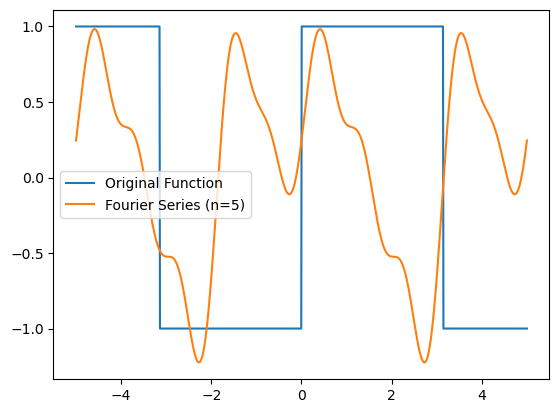

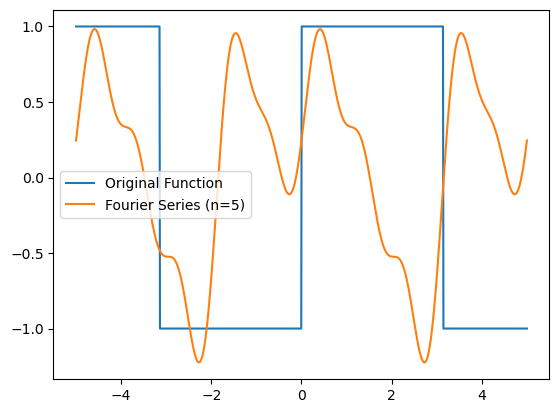

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#tkinter: This is Python's de-facto standard GUI (Graphical User Interface) package.
import tkinter as tk
#FigureCanvasTkAgg: This is a backend for embedding Matplotlib figures in Tkinter applications.
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Define your periodic function here
def square_wave(t):
    #input t, it returns 1 where (t % (2 * np.pi)) is less than π, and -1 otherwise
    return np.where((t % (2 * np.pi)) < np.pi, 1, -1)

# Calculate the integral using custom integration function
def integrate_without_builtin(a, b, f, num_steps=100000):
    delta_x = (b - a) / num_steps
    integral = 0
    for i in range(num_steps):
        x = a + i * delta_x
        integral += f(x) * np.exp(1j * x) * delta_x
    return integral

# Define function to compute Fourier series coefficients using integral
#n: The number of harmonics (including the fundamental frequency).
#T: The period of the square wave.
def calculate_coefficients(n, T):
    
    #integrating the square wave function over one period and dividing by the period.
    # Calculate a0
    a0 = (1 / T) * integrate_without_builtin(0, T, lambda t: square_wave(t))
    
    # Calculate an and bn for n > 0
    an_values = []
    bn_values = []
    for i in range(1, n + 1):
        #For each harmonic n, the square wave function is multiplied by cos⁡(2πit/T) and sin(2πit/T)
        #performed over the interval [0, T]
        #After the integral is computed, it is scaled by (2 / T)
        an = (2 / T) * integrate_without_builtin(0, T, lambda t: square_wave(t) * np.cos(2 * np.pi * i * t / T))
        bn = (2 / T) * integrate_without_builtin(0, T, lambda t: square_wave(t) * np.sin(2 * np.pi * i * t / T))
        an_values.append(an)
        bn_values.append(bn)
    
    return a0, an_values, bn_values

# Define function to compute Fourier series
def fourier_series(t, T, a0, an_values, bn_values):
    #np.complex128 specifies the data type of the array to be complex numbers with 128 bits of precision.
    result = np.zeros_like(t, dtype=np.complex128)  # Ensure result array is complex
    result += a0 / 2
    for n in range(len(an_values)):
        #summing the terms: a0/2 + an⋅cos⁡(2π(n+1)t/T)+ bn⋅sin⁡(2π(n+1)t/T) for each harmonic n.
        result += an_values[n] * np.cos(2 * np.pi * (n+1) * t / T) + bn_values[n] * np.sin(2 * np.pi * (n+1) * t / T)
    return result

# Define function to plot the graphs
def plot_fourier_series(n_terms, T):
    #n_terms, no. of terms in the Fourier series
    #T, the fundamental period of the square wave.
    #generates a time array t using np.linspace() to create 1000 evenly spaced points between -T and T
    t = np.linspace(-T, T, 1000)
    a0, an_values, bn_values = calculate_coefficients(n_terms, T)
    f_approx = fourier_series(t, T, a0, an_values, bn_values)
    
    fig, ax = plt.subplots()
    ax.plot(t, square_wave(t), label='Original Function')
    ax.plot(t, f_approx.real, label=f'Fourier Series (n={n_terms})')  # Plot only the real part of the Fourier series
    ax.legend()
    return fig

# Define function to get user input and plot the graphs
def on_button_click():
    n_terms = int(terms_entry.get())
    T = float(period_entry.get())
    a0, an_values, bn_values = calculate_coefficients(n_terms, T)
    print("a0:", a0)
    print("\nan:", an_values)
    print("\nbn:", bn_values)
    figure = plot_fourier_series(n_terms, T)
    plot_canvas.figure = figure
    plot_canvas.draw()

# Create the GUI
window = tk.Tk()
window.title("Fourier Series Visualizer")
window.geometry("800x600")
window.rowconfigure(1, weight=1)
window.columnconfigure(0, weight=1)

# Create terms input field
terms_label = tk.Label(window, text="Number of terms:")
#sticky='e' ensures that the label is anchored to the right side of its grid cell, so it will be right-aligned.
terms_label.grid(row=0, column=0, sticky='e')
terms_entry = tk.Entry(window)
terms_entry.grid(row=0, column=1, sticky='w')

# Create period input field
period_label = tk.Label(window, text="Fundamental period (T0):")
period_label.grid(row=0, column=2, sticky='e')
period_entry = tk.Entry(window)
period_entry.grid(row=0, column=3, sticky='w')

# Create plot button
button = tk.Button(window, text="Plot Fourier Series", command=on_button_click)
button.grid(row=0, column=4)

# Create initial plot
figure = plot_fourier_series(5, 2 * np.pi)
plot_canvas = FigureCanvasTkAgg(figure, window)
plot_canvas.get_tk_widget().grid(row=1, column=0, columnspan=5, sticky='nsew')

window.mainloop()